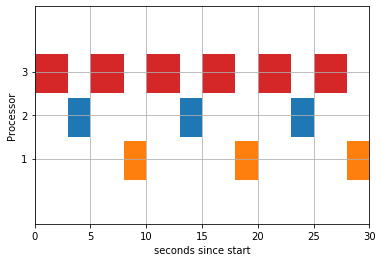

In [2]:
# Importing the matplotlib.pyplot
import matplotlib.pyplot as plt
from ftp_rm_scheduling import get_first_example_ftp_rm_schedule
def print_goal():
    # Declaring a figure "gnt"
    fig, gnt = plt.subplots()
 
    # Setting Y-axis limits
    gnt.set_ylim(0, 50)
 
    # Setting X-axis limits
    gnt.set_xlim(0, 30)
 
    # Setting labels for x-axis and y-axis
    gnt.set_xlabel('seconds since start')
    gnt.set_ylabel('Processor')
 
    # Setting ticks on y-axis
    gnt.set_yticks([15, 25, 35])
    # Labelling tickes of y-axis
    gnt.set_yticklabels(['1', '2', '3'])
 
    # Setting graph attribute
    gnt.grid(True)

    T1 = [(8,2), (18,2), (28,2)]
    T2 = [(3, 2), (13, 2), (23, 2)]
    T3 = [(0, 3), (5, 3), (10, 3), (15, 3), (20,3), (25,3)]
    # Declaring a bar in schedule
    gnt.broken_barh(T1, (10, 9), facecolors =('tab:orange'))
 
    # Declaring multiple bars in at same level and same width
    gnt.broken_barh(T2, (20, 9), facecolors ='tab:blue')

    gnt.broken_barh(T3, (30, 9), facecolors =('tab:red'))
    plt.show
    #plt.savefig("gantt1.png")
    
print_goal()



In [3]:
schedules = get_first_example_ftp_rm_schedule()

<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

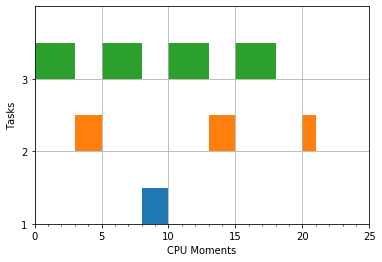

In [5]:
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.ticker import MultipleLocator

def gantt_of_schedule(schedules, time_limit ):
    TASKS_HEIGHT = 1
    # Declaring a figure "gnt"
    fig, gnt = plt.subplots()
    # Setting Y-axis limits
    gnt.set_ylim(0, len(schedules)*2 )
    #TASKS_HEIGHT /= 1.2
 
    # Setting X-axis limits
    gnt.set_xlim(0, time_limit)
    name = "tab10"
    cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
    colors = cmap.colors  # type: list
    gnt.set_prop_cycle(color=colors)
    # Setting labels for x-axis and y-axis
    gnt.set_xlabel('CPU Moments')
    gnt.set_ylabel('Tasks')
    
    #should update
    ticks = []
    labels = []
    for i in range(len(schedules)):
        ticks.append(((i)*2))
        labels.append(i+1)
    # Setting ticks on y-axis
    #major_ticks = np.arange(0, time_limit, 5)
    minor_ticks = np.arange(0, time_limit, 1)
    #gnt.set_xticks(minor_ticks, )
    #gnt.set_xticks(major_ticks)
    #gnt.tick_params(which='minor', length=1)
    gnt.xaxis.set_minor_locator(MultipleLocator(1))

    # Initialize minor ticks
    #gnt.minorticks_on()

# Now minor ticks exist and are turned on for both axes

# Turn off x-axis minor ticks
    #gnt.yaxis.set_tick_params(which='minor', bottom=False)
    
    gnt.set_yticks(ticks)
    # Labelling tickes of y-axis
    gnt.set_yticklabels(labels)
    # Setting graph attribute
    gnt.grid(True)
    #plt.style.use('classic')
    for i, schedule in enumerate(reversed(schedules)):
        #for j, task in enumerate(schedule):
        T = []
        for j, job in enumerate(schedule):
            tup = (job.start, job.nb_cpu_units)
            T.append(tup)
        gnt.broken_barh(T, (i*2,  1), facecolors=colors[i])
    plt.savefig('gantt_diagram.png')
    return plt
    
gantt_of_schedule(schedules, 25)
    